In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from pandas import DataFrame
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from pandas.tools.plotting import parallel_coordinates
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import discriminant_analysis
from sklearn import svm
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn import manifold

In [2]:
def set_plot_attr(size_X, size_Y):
    %matplotlib inline
    plt.style.use('fivethirtyeight')
    plt.rcParams['figure.figsize'] = (size_X, size_Y)
    plt.rcParams['font.size'] = 18
    plt.rcParams['axes.labelsize'] = 28
    plt.rcParams['axes.titlesize'] = 28
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams['legend.fontsize'] = 16
    plt.rcParams['figure.titlesize'] = 14
    plt.rcParams['axes.linewidth'] = 1

In [3]:
def load_df(csv_name):
    global df   
    df = pd.read_csv(csv_name)
    df.ix[:, df.columns!='category'] = preprocessing.MinMaxScaler().fit_transform(df.ix[:, df.columns!='category'])
    print('Shape of the loaded data frame:', df.shape)
    print('\nFirst 5 entries:\n', df.head())


In [4]:
def train_attr(train_col, predict_col):
    train_X = DataFrame()
    train_Y = DataFrame()
    train_X = df.iloc[:, train_col]
    train_Y = df.iloc[:, predict_col]
    return train_X, train_Y

In [5]:
def new_model():
    model_new = pd.DataFrame()
    return model_new

In [6]:
def add_model(x, y, model_clf, model_df):
    train_X, train_Y = train_attr(x, y)
    model = model_clf.fit(train_X, train_Y)
    model_instance = pd.DataFrame()
    model_instance['train_X'] = [train_X]
    model_instance['train_Y'] = [train_Y]
    model_instance['predicted'] = [pd.DataFrame(model.predict(train_X))]
    model_instance['coef'] = [pd.DataFrame(model.coef_)]
    model_instance['proba'] = [pd.DataFrame(model.predict_proba(train_X))]
    model_instance['score'] = model.score(train_X, train_Y) #test_X, test_Y
    model_df = model_df.append(model_instance, ignore_index= True)
    return model_df

In [7]:
def plot_pca(n_components, X, col):
    pca = PCA(n_components = n_components)
    y = pca.fit(X)
    print('Variance: ', pca.explained_variance_ratio_)
    tr = pca.transform(X)
    plt.scatter(tr[:,0], tr[:,1], c = col, cmap=plt.cm.plasma)

In [16]:
def plot_mds(n_components, X, col):
    mds = MDS(n_components = n_components)
    tr = mds.fit_transform(X)
    plt.scatter(tr[:,0], tr[:,1], c = col, cmap=plt.cm.plasma)
    print(mds.get_params(deep = True))

In [14]:
def plot_tsne(n_components, rand_state, X, col):
    tsne = TSNE(n_components = n_components, random_state = rand_state)
    tr = tsne.fit_transform(X)
    plt.scatter(tr[:,0], tr[:,1], c = col, cmap=plt.cm.plasma)
    print(tsne.get_params(deep = True))

In [10]:
set_plot_attr(size_X = 16, size_Y = 9) 

load_df("./winequality-red2.csv")

Shape of the loaded data frame: (1599, 13)

First 5 entries:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.13772

In [11]:
model_logit = new_model()

model_logit = add_model(x = (10, 1, 2, 3, 4), y = 12, model_clf = LogisticRegression(), model_df = model_logit)
model_logit = add_model(x = (10, 9, 8), y = 12, model_clf = LogisticRegression(), model_df = model_logit)

#plot_mds(n_components = 2, X = model_logit.loc[0]['train_X'], col = model_logit.loc[0]['predicted'])

In [12]:
model_logit

,train_X,train_Y,predicted,coef,proba,score
0,alcohol volatile acidity citric acid ...,0 0.0 1 0.0 2 0.0 3 1....,0 0 0.0 1 0.0 2 0.0 3 ...,0 1 2 3 ...,0 1 0 0.754328 0.245...,0.737961
1,alcohol sulphates pH 0 0.15...,0 0.0 1 0.0 2 0.0 3 1....,0 0 0.0 1 0.0 2 0.0 3 ...,0 1 2 0 5.835269 3...,0 1 0 0.740505 0.259...,0.711069


{'dissimilarity': 'euclidean', 'max_iter': 300, 'verbose': 0, 'n_jobs': 1, 'n_init': 4, 'metric': True, 'eps': 0.001, 'random_state': None, 'n_components': 2}


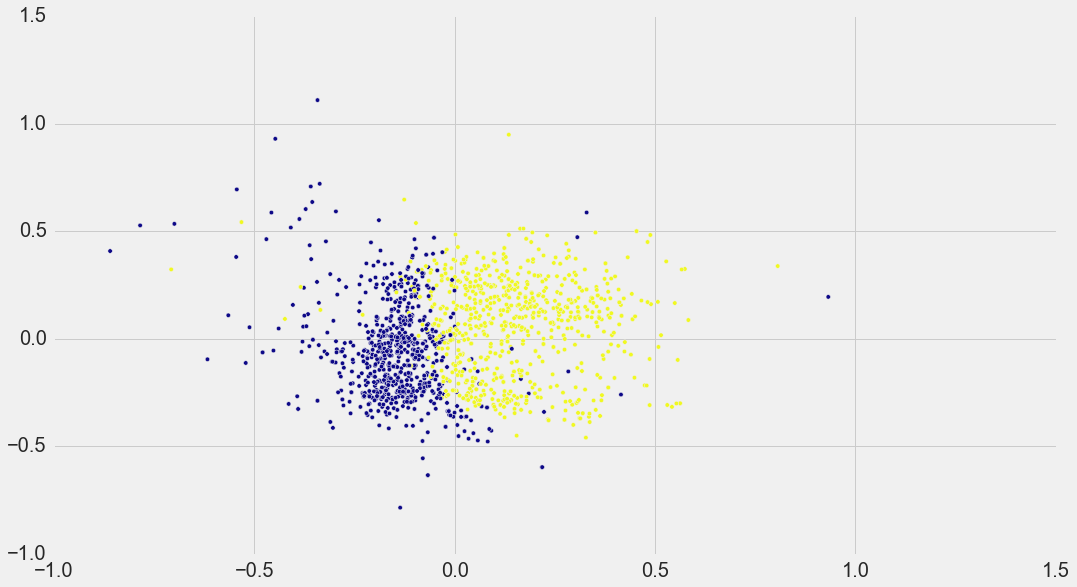

In [17]:
plot_mds(n_components = 2,  X = model_logit.loc[0]['train_X'], col = model_logit.loc[0]['predicted'])

In [ ]:
plot_pca(n_components = 2, X = model_logit.loc[0]['train_X'], col = model_logit.loc[0]['predicted'])

In [ ]:
plot_tsne(n_components = 2, rand_state = 100, X = model_logit.loc[0]['train_X'], col = model_logit.loc[0]['predicted'])